# Results for XGB when applying syn tranformation to both premise and hypothesis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML 
from lr.stats.h_testing import get_boot_p_value

In [2]:
# np.random.choice(range(30)), np.random.choice(range(50))

In [3]:
def show_df(df):
    not_boot_columns = [c for c in df.columns if c.find("boot") == -1]
    display(HTML(df[not_boot_columns].to_html()))
    
def get_boots(df):
    boot_columns = [c for c in df.columns if c.find("boot") > -1]
    boots = df[boot_columns].transpose().reset_index(drop=True)
    boots = boots[0]
    boots.name = "boots_rho_{}_dgp_seed_{}_rs_{}".format(df.rho[0],
                                                             df.dgp_seed[0],
                                                             df.random_state[0])
    return boots

def show_test(df):
    t_boots = get_boots(df)
    t_obs = df.observable_t_stats[0]
    p_value = df.p_value[0]
    new_p = get_boot_p_value(t_boots, t_obs)
    assert new_p == p_value     
    fig, ax = plt.subplots(figsize=(10,5))
    t_boots.hist(ax=ax, label="bootstrap replications");
    plt.axvline(x=t_obs, color='r', linestyle='-', label="observed (t={:.1f})".format(t_obs));
    ax.set_xlabel("t", fontsize=14);
    ax.set_ylabel("frequency", fontsize=14);
    ax.set_title("Bootstrap test histogram (p-value = {:.8f})".format(p_value) +"\n", fontsize=16)
    plt.legend(loc="best");

## Results for $\rho = 0$

In [4]:
df_rho_0 = pd.read_csv("results/snli/xgb/sin_p_h/rho_0p00_random_state_42.csv")
show_df(df_rho_0)


,m,train_accuracy_mean,train_accuracy_std,validation_accuracy,transformed_validation_accuracy,observable_t_stats,accuracy_difference,test_size,standart_error,p_value,transformation_time,training_time,test_time
0,1,0.562648,0.0,0.557509,0.515241,11.116414,0.042268,9842,0.377213,0.0,0.890891,918.358759,927.873776
1,2,0.555849,0.0,0.557204,0.514936,10.893126,0.042268,9842,0.384945,0.0,0.921309,643.518823,653.108380


## Results for $\rho = 0.25$

In [5]:
df_rho_0p25 = pd.read_csv("results/snli/xgb/sin_p_h/rho_0p25_random_state_43.csv")
show_df(df_rho_0p25)

,m,train_accuracy_mean,train_accuracy_std,validation_accuracy,transformed_validation_accuracy,observable_t_stats,accuracy_difference,test_size,standart_error,p_value,transformation_time,training_time,test_time
0,1,0.554766,0.0,0.554765,0.545824,2.998661,0.008941,9842,0.295811,0.002,0.970845,780.376662,789.837063
1,2,0.553691,0.0,0.554359,0.544808,3.044795,0.009551,9842,0.311192,0.002,0.989917,714.181519,723.599875


## Results for $\rho = 0.5$

In [6]:
df_rho_0p5 = pd.read_csv("results/snli/xgb/sin_p_h/rho_0p50_random_state_44.csv")
show_df(df_rho_0p5)

,m,train_accuracy_mean,train_accuracy_std,validation_accuracy,transformed_validation_accuracy,observable_t_stats,accuracy_difference,test_size,standart_error,p_value,transformation_time,training_time,test_time
0,1,0.543908,0.0,0.537289,0.538102,-0.294485,-0.000813,9842,0.273832,0.806,0.998752,839.227551,848.711188
1,2,0.566564,0.0,0.563300,0.569092,-2.117409,-0.005792,9842,0.271349,0.038,1.053300,588.082037,597.556483


## Results for $\rho = 0.75$

In [7]:
df_rho_0p75 = pd.read_csv("results/snli/xgb/sin_p_h/rho_0p75_random_state_45.csv")
show_df(df_rho_0p75)

,m,train_accuracy_mean,train_accuracy_std,validation_accuracy,transformed_validation_accuracy,observable_t_stats,accuracy_difference,test_size,standart_error,p_value,transformation_time,training_time,test_time
0,1,0.546428,0.0,0.533022,0.548364,-4.667339,-0.015342,9842,0.326111,0.0,1.054477,826.456741,835.907482
1,2,0.570079,0.0,0.559642,0.572343,-3.957971,-0.012701,9842,0.318343,0.0,1.047333,731.224401,740.627168


## Results for $\rho = 1.0$

In [8]:
df_rho_1p0 = pd.read_csv("results/snli/xgb/sin_p_h/rho_1p00_random_state_46.csv")
show_df(df_rho_1p0)

,m,train_accuracy_mean,train_accuracy_std,validation_accuracy,transformed_validation_accuracy,observable_t_stats,accuracy_difference,test_size,standart_error,p_value,transformation_time,training_time,test_time
0,1,0.572558,0.0,0.496749,0.572038,-17.102584,-0.075290,9842,0.436732,0.0,1.013596,1206.526560,1215.975755
1,2,0.557837,0.0,0.491668,0.552022,-13.984603,-0.060354,9842,0.428149,0.0,1.023427,576.751087,586.185998


## Gathering all p-values

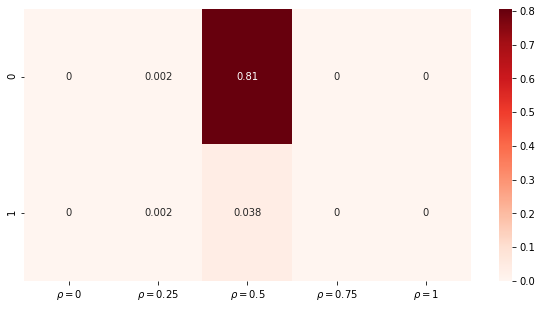

In [9]:
dfs = [df_rho_0, df_rho_0p25, df_rho_0p5, df_rho_0p75, df_rho_1p0]
names = [r"$\rho = 0$", r"$\rho = 0.25$", r"$\rho = 0.5$", r"$\rho = 0.75$", r"$\rho = 1$"]

all_p_values = {}
for df, name in zip(dfs, names):
    results = df.p_value
    all_p_values[name] = results 

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(all_p_values), annot=True, cmap="Reds", ax=ax);




In [11]:
(1206.526560*2*5)/3600

3.351462666666667